In [1]:
import pygsti
import pygsti.algorithms.randomcircuit as rc
#note: you need qsearch to run this

In [2]:
num_qubits = 2
qubit_labels = tuple((f'Q{i}' for i in range(num_qubits))) #Usually I use this convention for qubit labels. The default is natural numbers 0, ..., n-1
gates = ['Gxpi2', 'Gzr', 'Gcphase'] #list of all of the gates
availability = {'Gcphase': [('Q0', 'Q1'),('Q1', 'Q0')]} #specify connectivity as a dictionary with gate names and a list of connected qubit pairs

In [3]:
c = pygsti.circuits.Circuit(None, stringrep='')

In [4]:
dir(c)

['__add__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__mul__',
 '__ne__',
 '__new__',
 '__pow__',
 '__radd__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_alignmarks',
 '_append_idling_layers_inplace',
 '_append_idling_lines',
 '_append_labels_as_lines',
 '_append_layer_component',
 '_bare_init',
 '_clear_labels',
 '_combine_one_q_gates_inplace',
 '_compilable_layer_indices_tup',
 '_fastinit',
 '_is_line_idling',
 '_labels',
 '_labels_lines_str',
 '_layer_components',
 '_line_labels',
 '_name',
 '_occurrence_id',
 '_print_labelinfo',
 '_proc_key_arg',
 '_proc_layers_arg',
 '_proc_lines_arg',
 '_remove_layer_component',
 '_replace_layer

In [16]:
model = pygsti.models.create_crosstalk_free_model(ps, evotype='statevec', simulator='matrix')

In [18]:
? model.circuit_layer_operator

In [21]:
? pygsti.forwardsims.MatrixForwardSimulator

In [15]:
? pygsti.forwardsims.MatrixForwardSimulator

In [4]:
ps = pygsti.processors.processorspec.QubitProcessorSpec(num_qubits, gates, qubit_labels=qubit_labels, availability=availability)

In [5]:
#create a depth 1 DRB circuit
rc.create_udrb_circuit(ps, 2, layer_type='cz-zxzxz')

There are 20 processors available to Pool.
The branching factor is 1.
The beam factor is 20.
New best! 0.5023627258463241 at weight 0
New best! score: 0.20366490602387144 at weight: 1
New best! score: 0.09454978601459452 at weight: 2
New best! score: 3.3306690738754696e-16 at weight: 3
Finished compilation at weight 3 with score 3.3306690738754696e-16 after 0.09790500499730115 seconds.
Qubit Q0 ---|Gzr(0.7224422492521239)|-|Gxpi2|-|Gzr(1.1507421423659352)|-|Gxpi2|-|Gzr(-0.5104492880947968)|-|CQ1|-|Gzr(-0.6856010323687585)|-|Gxpi2|-|Gzr(2.691006124671854) |-|Gxpi2|-|Gzr(-1.0550132320219952)|-|CQ1|-|Gzr(-1.4512045188444116)|-|Gxpi2|-|Gzr(1.2042352335947863)|-|Gxpi2|-|Gzr(1.8395796477539097) |---
Qubit Q1 ---|Gzr(1.2220061909809168)|-|Gxpi2|-|Gzr(1.8252739705577234)|-|Gxpi2|-| Gzr(1.567712667764566) |-|CQ0|-|  Gzr(2.6701354655648)  |-|Gxpi2|-|Gzr(2.4461613290868116)|-|Gxpi2|-|Gzr(-2.8487725183388655)|-|CQ0|-|Gzr(3.0704291867847244) |-|Gxpi2|-|Gzr(1.9212888577121716)|-|Gxpi2|-|Gzr(-1.48779

TypeError: unhashable type: 'list'

In [6]:
%debug #why is there an empty layer

NOTE: Enter 'c' at the ipdb>  prompt to continue execution.
> <string>(1)<module>()

ipdb> u
> /home/jordanh/.pyenv/versions/3.8.0/lib/python3.8/bdb.py(587)run()
    585         sys.settrace(self.trace_dispatch)
    586         try:
--> 587             exec(cmd, globals, locals)
    588         except BdbQuit:
    589             pass

ipdb> u
*** Oldest frame
ipdb> q


In [6]:
#create a DRB edesign
ds = [2**i for i in range(8)]
edesign = pygsti.protocols.create_udrb_edesign(ps, ds, 5, layer_type='cz=zxzxz', qubit_labels=None, twoQ_gate_density=1/2)

TypeError: create_udrb_edesign() got an unexpected keyword argument 'layer_type'

In [56]:
model = pygsti.models.create_crosstalk_free_model(ps)

In [61]:
data = pygsti.data.simulate_data(model, edesign.all_circuits_needing_data, 1000)

/home/jordanh/pyGSTi/pygsti/layouts/evaltree.py:183: UserWarning: Created an evaluation tree that is inefficient: tree-size > 100 * #circuits !
This is likely due to the fact that the circuits being simulated do not have a
periodic structure. Consider using a different forward simulator (e.g. MapForwardSimulator).
  _warnings.warn(("Created an evaluation tree that is inefficient: tree-size > %d * #circuits !\n"


In [62]:
pd = pygsti.protocols.ProtocolData(edesign, data)

In [63]:
rb = pygsti.protocols.RandomizedBenchmarking()

In [64]:
result = rb.run(data=pd)

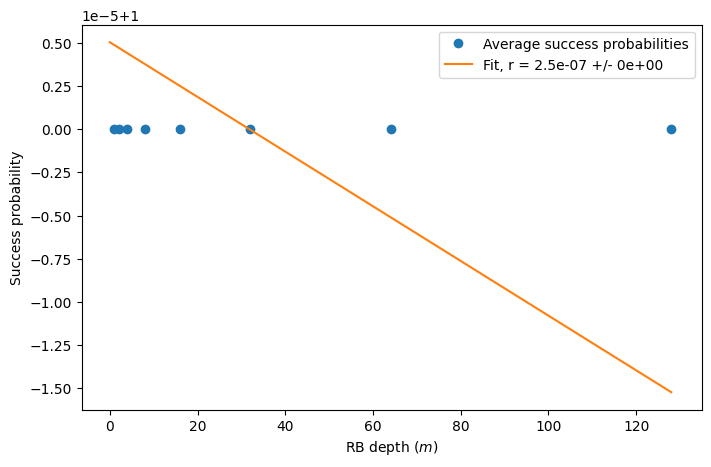

In [65]:
result.plot()